# Time series analysis

Struture of the report:
- Time series problem (Introduction and Project outline and software used)
- Background Theory
- Explain dataset and vaiables
- Model 1: ARIMA model (Implementation)
- Model 2: SARIMA model (Implementation)
- Comparing the two models (Testing and evaluation)
- Conclusion
- References: 
- Appendences: Attach Jupyter notebook 

Whenever any data or observations are recorded at regular time intervals, it's refered to as Time Series data. Time Series attempts to observe data over time period to forecast or predict what will happen in the future. They are often based on patterns or re-occuring trends from previous time periods. History often repeats itself, so whatever events happened in the past, are likely to happen in the future. 
{}
By fitting a model to time series data, we can create forecasts of future outcomes.


The [dataset](https://www.marketwatch.com/investing/index/spx/download-data?startDate=3/7/2018&endDate=11/12/2021) for this project was sourced from 'marketwatch.com' which is a website that provides the latest stock prices updated on a daily basis. The website allows you to download all the S&P 500 Stock Price information at a date range and a frequency of your choosing as a 'csv' file. We used this publically available data source to build our dataset. 

For our purpose, we choose to collect the S&P 500 stock prices on a monthly basis, from '03/2018' to '11/2021' so the dataset contains 45 datapoints in total spaning over 3 years. We renamed the dataset to 'SaP_500_3yrs_Monthly.csv' to improve the readability of the project.

This dataset contains the Opening price of the S&P 500, Closing price of the S&P 500, highest price and lowest price of the S&P 500 on that day. 

The S&P 500 (Standard and Poor's 500) is a stock market index tracking the performance of 500 leading U.S publicly traded companies, with a primary emphasis on market capitalisation. A stock index can be simply put as a collection of stocks that are tracked together to give people an overall idea of how the stock market is doing. It's a diversified and a relatively low-risk way to invest in stocks. 

The S&P is a float-weighted index, meaning the market capitalisations of the companies in the index are adjusted by the number of shares available for public trading.
It is the most popular index because it represents the largest publicly traded corporations in the U.S.

There give a general indication of how the overall market which, is thousands of stocks are doing

The dataset obtained from the S&P 500 data contains the variables:
- 'Date' - Date of the S&P 500 prices 
- 'Open'- Opening Price of the S&P 500 on the respective date
- 'High' - Highest Price of the S&P 500 on the respective date
- 'Low' - Lowest Price of the S&P 500 on the respective date
- 'Close' - Price the S&P 500 finished on the respective date (in U.S. Dollers)

We will analysing two different models for tackling the problem and comparing the result from each.

## Loading the dataset

Loads the 'SaP_500_3yrs_Monthly.csv' file as a DataFrame ('SP_500'), which contains our entire dataset. 

Then we will print the entire dataset.

In [1]:
# Importing the pandas library
import pandas as pd

# Loads the 'SaP_500_3yrs_Monthly.csv' which contains our dataset
SP_500 = pd.read_csv('SaP_500_3yrs_Monthly.csv')

# Prints the entire dataset
SP_500.head(50)

,Date,Open,High,Low,Close
0,11/2021,4610.62,4663.46,4595.06,4660.57
1,10/2021,4317.16,4608.08,4278.94,4605.38
2,09/2021,4528.80,4545.85,4305.91,4307.54
3,08/2021,4406.86,4537.36,4367.73,4522.68
4,07/2021,4300.73,4429.97,4233.13,4395.26
5,06/2021,4216.52,4302.43,4164.40,4297.50
6,05/2021,4191.98,4238.04,4056.88,4204.11
7,04/2021,3992.78,4218.78,3992.78,4181.17
8,03/2021,3842.51,3994.41,3723.34,3972.89
9,02/2021,3731.17,3950.43,3725.62,3811.15


As we can see the dataset begins at the most current value of the S&P price which is not ideal for the ARIMA model. Therefore we will have to reverse the order of the data to make it usable. 

Below, we will remove all the columns in the 'SP_500' DataFrame except the 'Close' column which is necessary for implementing the ARIMA model.

In [2]:
## Remove all the columns in 'SP_500' DataFrame except 
## the 'Close' column  which is useful for plotting the data 
SP_500_Close = SP_500[['Close']].dropna()

## Visualising the dataset

We will plot the dataset so we can plan our approach for the Time series problem.

In order to plot out S&P 500 dataset we need to:
- Create a new DataFrame contining only the 'Date' and 'Close' Variables.
- Create a DataFrame containing only the 'Close' variable and reverse the order of the variable.
- Create a seperate DataFrame containing only the 'Date' variable and reverse the order of the variable.
- Convert the 'Date' DataFrame to datetime
- Plot the final updated variables using matplotlib

Creating a new DataFrame for plotting the S&P 500 dataset purposes only containing the 'Date' and 'Close' Variables as it won't affect the original dataset.

We will seperate the 'Close' variable with the DataFrame 'Plotting_SP_500_Profit' containing all the closing day prices in our dataset. The order of the 'Close' prices are reversed since our dataset is in the opposite order for our plot.

We will then seperate the 'Date' variables with a unique DataFrame to convert the variable to datetime which is needed for the 'autofmt_xdate()' functionused to make the plot more readable. The order of the 'Date' will also need to be reversed to match the prives from above.

Finally we can plot the complete dataset with the updated variables to observe the monthly price of the S&P 500 from '03/2018' to '11/2021'.

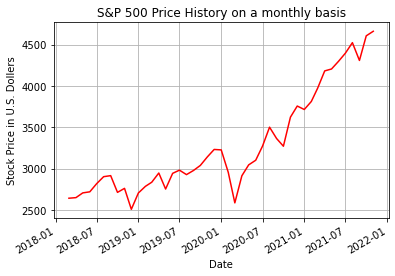

In [3]:
from matplotlib import pyplot as plt

## Creates a new Dataframe using only the 'Date' and 'Close' variables
## to plot the dataset only using the closing day  price of the S&P 
## Stock Price and the dates for these Closing day prices.
Plotting_SP_500 = pd.DataFrame(SP_500, columns = ['Date', 'Close'])

## Creates a Variable 'Plotting_SP_500_Profit' which contains all 
## the closing day prices in our dataset.  
## It is also necessary to reverse the order of the 
## 'Plotting_SP_500_Profit' variables content because our data set 
## starts with the newest content from the dataset whereas reasonable 
## plots containing data need to be shown in the reverse order.
Plotting_SP_500_Profit = SP_500.iloc[:, -1].values
Plotting_SP_500_Profit = Plotting_SP_500_Profit[::-1]

## Creates a Variable 'Plotting_SP_500_Date' which contains all the 
## dates assosiated with the closing price in the 
## 'Plotting_SP_500_Profit' variable created above.
## This new variables content also need to be reversed 
## in order to align properly with the above variable.
Plotting_SP_500_Date = SP_500.iloc[:, 0].values
Plotting_SP_500_Date = Plotting_SP_500_Date[::-1]

## Converts the content in the 'Plotting_SP_500_Date' variable to 
## datetime. This is needed for the 'autofmt_xdate()' function 
## used to make the plot of the dataset more readable.
Plotting_SP_500_Date = pd.to_datetime(Plotting_SP_500_Date)

## Creates a new Dateframe to store only the content needed to 
## plot the dataset.
Plot_for_SP_500 = pd.DataFrame(Plotting_SP_500_Profit, Plotting_SP_500_Date)

## Using the 'matplotlib' libriary to plot the dataset 
plt.title('S&P 500 Price History on a monthly basis')
plt.xlabel('Date')
plt.ylabel('Stock Price in U.S. Dollers')
plt.grid(True)
plt.plot(Plot_for_SP_500, color = 'red')
plt.gcf().autofmt_xdate()

plt.show()

## Model 1: ARIMA model

The first model we are going to test for this problem is an ARIMA (AutoRegressive Integrated Moving Average) model, which is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.

Notation for the ARIMA model: $\text{ARIMA}(p,d,q)$

The equation for the ARIMA model:


$$Y_t = c + \beta_1{Y_{t-1}} + \beta_2{Y_{t-2}} + ...  + \beta_p{Y_{t-p}}  + \theta_1{\epsilon_{t-1}} + ... + \theta_q{\epsilon_{t-q}} + {\epsilon_t}$$

$$\text{where}$$

$$c \text{ is the intercept}$$

$$\text{and}$$
 
$$\beta_1{Y_{t-1}} + \beta_2{Y_{t-2}} + ...  + \beta_p{Y_{t-p}} \text{ are the lags (AR)}$$

$$\text{and}$$

$$\theta_1{\epsilon_{t-1}} + ... + \theta_q{\epsilon_{t-q}} + {\epsilon_t} \text{ are the errors (MA)}$$

In basic terms we can look at the formula as:

$$ \text{Predicted } {Y_t} = Constant + \text{Linear combination Lags of Y upto p lags} + \text{Linear Combination of Lagged forecast error upto q lags} $$

An ARIMA model is characterised by 3 terms(<i>p</i>, <i>d</i>, <i>q</i>):
- <i>p</i> is the order of the AR term. It refers to the number of lags
- <i>d</i> is the number of differencing required to make the time series stationary refering to the I term.
- <i>q</i> is the order of the MA term. It refers to the numbrt of lagged forecast errors that should go into the ARIMA model.

It is necessary for the time series to be stationary in order to fit the ARIMA model.

If a time series, has seasonal patterns you can add seasonalterm to create a SARIMA model.

In order to fit the ARIMA model, the time searies need to be stationary of as close to staionarity as possible.

Price series are typically non-stationary because the time in which the data is collected has a tendency to affect how the prices can change over a period of time, such as the season of the year where the data has been collected.

Finding the order of differencing (d) in ARIMA model

Finding the order of the AR term (p)

Finding the order of the MA term (q)

Accuracy metrics for Time Series Forecast


### SARIMA model
SARIMA(p,d,q)(P,D,Q)S where the P, D and Q are SAR, order if seasonal differencing and SMA terms respectively and 's' is the frequency of the time series.

Seasonal Autoregressive Integrated Moving Average (SARIMA) is an extension of ARIMA that explicity supports univariate time aeries data with a seasonal component.

<b>Seasonal Elements</b>
There are four seasonal elements that are not part of ARIMA that must be configured

- <b>P:</b> Seasonal autoregressive order 
- <b>D:</b> Seasonal differencing order
- <b>Q:</b> Seasonal moving average order
- <b>s:</b> The number of time steps for a single seasonal period

<b>Steps required to implement the ARIMA model:</b>
1. Loads the dataset 
2. Check if the time series is stationary
3. Determine the <i>d</i> value
4. Create ACF and PACF plots for the time series
5. Determine the <i>p</i> and <i>q</i> values
6. Fit the ARIMA model to the time series with the parameters calculated previously
7. Predicting the future values on a testing sets
8. Calculate RMSE to check the performance of the model
9. Comparing the forecasted values vs the Actual Values

We will begin building the ARIMA model by finding the <i>d</i> term.

---------------------------------------------------------------------

### Determine <i>d</i> - the number of differencing required to make the time series stationary

It's firstly important to check if the time series is stationary. 

This can be done using the '<i>adfuller</i>' function from the '<i>statsmodel</i>' libriary which performs the Augmented Dickey-Fuller (ADF) test on the S&P 500 Closing prices to show the presence of serial correlation in our time series. With Time Series data, this test generally proves that the time series is non-stationary.

As in our case, if the p-value > 0.05 meaning the Time series is definately Stationary. 

we'll need to find the order of differencing.

First we need to create a new variable 'SP_500_Close_Values' which will contain the entire dataset. Then we will issolate and invert the 'Close' price which is all that is needed for the ARIMA model.

Preparing the data for the ARIMA model will require:
- Create a new variable 'SP_500_Close_Values' which contains all the prices of S&P 500.
-

In [4]:
## Importing the 'adfuller' functionfrom the 'statesmodel' libriary
## to perform the Augmented Dickey-Fuller (ADF) to check if
## the time series stationary

# Importing the necessarey libriaries
from statsmodels.tsa.stattools import adfuller


## Creates a Variable 'SP_500_Close_Values' which contains all
## the content from the 'SP_500_Close' Variable.
## It is also necessary to reverse the order of the 
## 'SP_500_Close_Values' variables content because our data set 
## starts with the newest content from the dataset we need to 
## have the newest content at the end of the Dtaframe.
## We also need to reset the 'index' column or else our plots 
## will be in reverse
SP_500_Close_Values = SP_500_Close
Reverse_SP_500_Close_Values = SP_500_Close_Values[::-1]
Reverse_SP_500_Close_Values.reset_index(inplace=True, drop=True)

## Uses the 'adfuller' function to check if the time series
## is stationary or not
result = adfuller(Reverse_SP_500_Close_Values.dropna())

print('ADF Statistic:   ', result[0])
print('p-value:         ', result[1])

ADF Statistic:    0.3802555084426435
p-value:          0.9807413629845056


Our p-value is 0.98 so it clear that this price series is non-stationary. This isn't a problem since we could have probably guessed that the time in which the prices were collect will influence future results.

In order to make the ARIMA model work for this time series we need to difference them to remove the trends in the time series. It might take multple differences to make the time series stationary. The amount of differences required is known as the order of differencing (d).





We can use the ACF plot from stats.models and the acf plot tells us how many terms are required to remove any autocorrelation in the series

#### Autocorrelation Function (ACF)

Autocorrelation refers to the correlation between a Time series and a previous version of the time series.

For this dataset, we shifted the time series back by one month. This shift is known as the lag.

The 'statesmodel' libriary has a function 'plot_act' to plot the autocorrelation for our time series data. This function plots the lags on the horizonal axis and the correlations on the vertical axis.

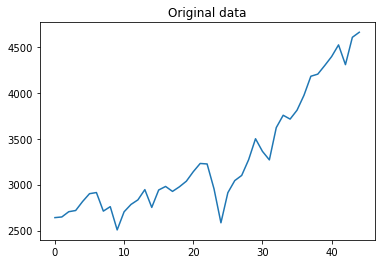

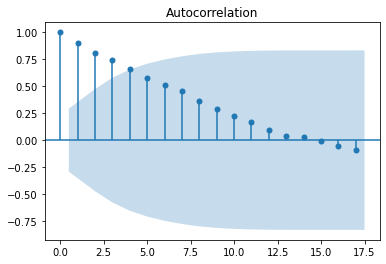

In [5]:
from statsmodels.graphics.tsaplots import plot_acf

## Plots the autocorrelation for the closing prices of the S&P 500 
## in our dataset
plt.plot(Reverse_SP_500_Close_Values)
plt.title('Original data')
plot_acf(Reverse_SP_500_Close_Values)
plt.show()

$$ \text{First-order differencing: } x'_t = x_t x_{t -1} $$ 

Next, we will plot the difference of the closing price data along with the autocorrelation of the difference for the closing prices of the S&P 500 in our dataset

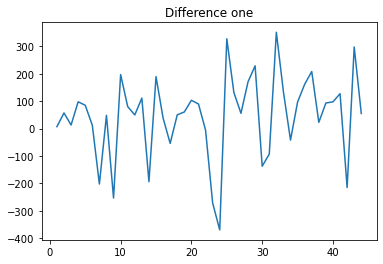

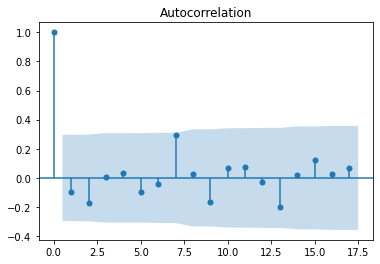

In [6]:
## Calculates the difference of the closing price data
diff = Reverse_SP_500_Close_Values.diff().dropna()

## Plots the difference of the closing price data along with
## the autocorrelation of the difference for the closing prices 
## of the S&P 500 in our dataset
plt.plot(diff)
plt.title('Difference one')
plot_acf(diff)
plt.show()

$$ \text{Second-order differencing: } x_t* = x'_t - x'_{t -1} $$

$$ = (x_t - x_{t-1}) - (x_{t-1} - x_{t-2}) $$

$$ = x_t - 2x_{t-1} + x_{t-2} $$

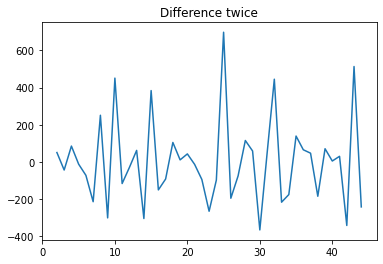

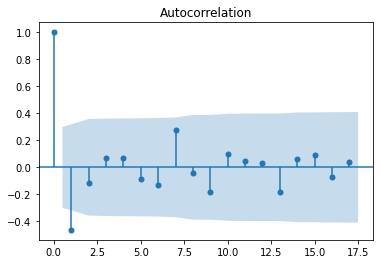

In [7]:
## Calculates the difference of the difference 
## the closing price data
diff = Reverse_SP_500_Close_Values.diff().diff().dropna()

## Plots the second difference of the closing price data along with
## the autocorrelation of the difference for the closing prices 
## of the S&P 500 in our dataset
plt.plot(diff)
plt.title("Difference twice")
## Add ; to the end of the plot function so that the plot is not 
## duplicated
plot_acf(diff);
plt.show()

Lag terms in graph skew to lag axis when the series is differenced twice indicating that the series is over differenced. So, we will set the <i>d</i> term as 1.

Our order of differencing term = 1

The <i>d</i> term will also be confirmed below with the function '<i>pmdarima.arima.ndiffs</i>': 

In [8]:
## Estimates the ARIMA differencing term d required to make the time 
## series stationary
from pmdarima.arima.utils import ndiffs

print("Estimate ARIMA diferencing term, d, required to convert the time series to stationary below:")
ndiffs(Reverse_SP_500_Close_Values, test="adf")

Estimate ARIMA diferencing term, d, required to convert the time series to stationary below:


1

Since we came to the same conclusion, we can be reasonably confident in our result.

### Determining <i>p</i> - the order of the AR term

p is the order of the Auto Regressive (AR) term. It refers to the number of lags to be used as predictors.

We can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.

The partial autocorrelation represents the correlation between the series and its lags.

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf

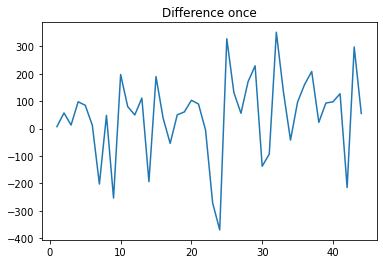

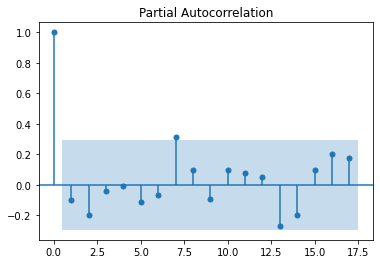

In [10]:
diff = Reverse_SP_500_Close_Values.diff().dropna()

plt.plot(diff)
plt.title('Difference once')
plot_pacf(diff)
plt.show()

The partial autocorrelation lag number 7 is above the significance line, hence we will set <i>p</i> term as 7.

### Determining <i>q</i> - the order of the MA term

The <i>q</i> term is the order of the Moving Average(MA), which refers to the number of lagged forecast errors that should go in the ARIMA model.

We can look at the ACF plot for the number of MA terms.

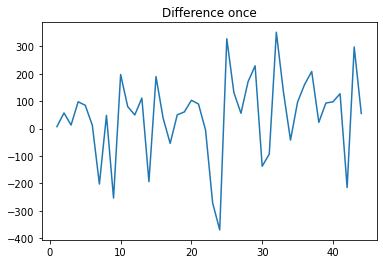

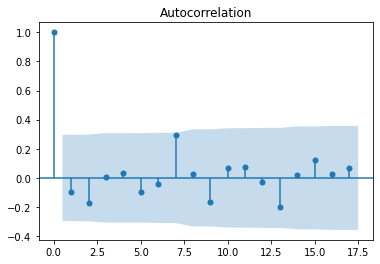

In [11]:
diff = Reverse_SP_500_Close_Values.diff().dropna()

plt.plot(diff)
plt.title("Difference once")
plot_acf(diff);
plt.show()

We choose a forcast of 0

### Fitting the ARIMA model

ARIMA(p,d,q)

p = 7
d = 1
q = 0

The model is prepared on the training data by calling the fit() function.

In [12]:
from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.filterwarnings('ignore')     # Ignore unnecessary warnings

# ARIMA Model
#model = ARIMA(Reverse_SP_500_Close_Values, order=(6, 1, 1))
model = ARIMA(Reverse_SP_500_Close_Values, order=(7, 1, 0))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                   44
Model:                 ARIMA(7, 1, 0)   Log Likelihood                -281.026
Method:                       css-mle   S.D. of innovations            142.572
Date:                Wed, 01 Dec 2021   AIC                            580.052
Time:                        20:41:59   BIC                            596.109
Sample:                             1   HQIC                           586.007
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            44.4423     18.754      2.370      0.018       7.686      81.199
ar.L1.D.Close    -0.1018      0.142     -0.714      0.475      -0.381       0.178
ar.L2.D.Close    -0.1646      0.146     -1.129      0.259      -0.450       0.121
ar.L3.D.Close    -0.0363      0.151     -0.241      0.810      -0.332       0.259
ar.L4.D.Close    -0.0167      0.150     -0.111      0.912      -0.311       0.277
ar.L5.D.Close    -0.0465      0.148     -0.315      0.753      -0.336       0.243
ar.L6.D.Close    -0.0399      0.144     -0.277      0.782      -0.322       0.242
ar.L7.D.Close     0.2780      0.146      1.904      0.057      -0.008       0.564
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0741           -0.5297j            1.1976           -0.4271
AR.2           -1.0741           +0.5297j            1.1976            0.4271
AR.3           -0.2459           -1.1202j            1.1468           -0.2844
AR.4           -0.2459           +1.1202j            1.1468            0.2844
AR.5            0.7310           -0.9532j            1.2012           -0.1459
AR.6            0.7310           +0.9532j            1.2012            0.1459
AR.7            1.3214           -0.0000j            1.3214           -0.0000
-----------------------------------------------------------------------------
"""

Plot the residual errors to ensure there are no patterns (that is, looking for constant mean and variance). 

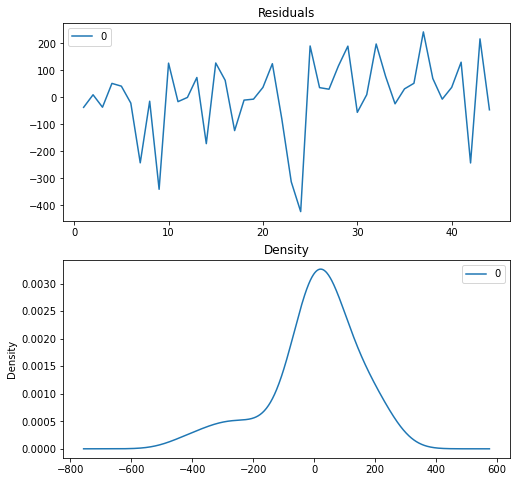

In [13]:
# Plot residual errors
residuals = pd.DataFrame(result.resid)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

residuals.plot(title = 'Residuals', ax=ax1)
residuals.plot(kind='kde', title = 'Density', ax=ax2)
plt.show()

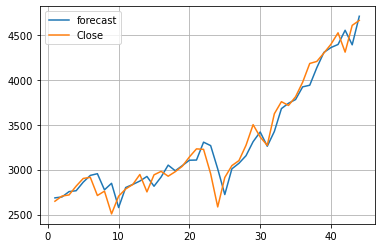

In [14]:
# Actual vs Fitted
result.plot_predict(
    start=1, end=44, dynamic=False,
)

plt.grid(True)
plt.show()

Train test split

Creating a testing and testing set to apply a  

In [15]:
## 'n' is an integer that is the equivalant to 87.5% of the
## amount of closing prices from our dataset
n = int(len(Reverse_SP_500_Close_Values) * 0.875)
## Our training set contains the first 87.5% of closing prices 
## from our dataset
train = Reverse_SP_500_Close_Values[:n]
## Our testing set will contain the remainder of closing prices 
## from our dataset
test = Reverse_SP_500_Close_Values[n:]

In [16]:
print('Number of closing prices in our training set:    ', len(train))
print('Number of closing prices in our testing set:     ', len(test))

Number of closing prices in our training set:     39
Number of closing prices in our testing set:      6


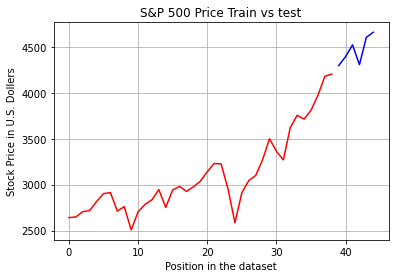

In [17]:
## Plots the training vs testing data from the S&P 500 data
plt.title('S&P 500 Price Train vs test')
plt.xlabel('Position in the dataset')
plt.ylabel('Stock Price in U.S. Dollers')
plt.grid(True)
plt.plot(train, color = 'red')
plt.plot(test, color = 'blue')

plt.show()

In [18]:
model = ARIMA(train, order=(7, 1, 0))
result = model.fit()

In [19]:
step = 6

# Forecast
fc, se, conf = result.forecast(step, alpha=0.05) # 95% confidence interval

In [20]:
## Make as pandas series
fc = pd.Series(fc, index=test[:step].index)

lower = pd.Series(conf[:, 0], index=test[:step].index)
upper = pd.Series(conf[:, 1], index=test[:step].index)

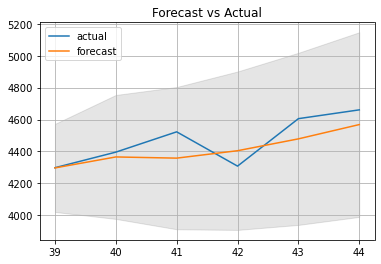

In [21]:
plt.plot(test[:step], label="actual")
plt.plot(fc, label="forecast")
plt.fill_between(lower.index, lower, upper, color="k", alpha=0.1)
plt.title("Forecast vs Actual")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

In [22]:
answer = pd.DataFrame({'Actual Price' :test['Close'], 'Forecasted Price' :fc, 'Difference' :test['Close']-fc})
answer

,Actual Price,Forecasted Price,Difference
39,4297.50,4296.171510,1.328490
40,4395.26,4365.077971,30.182029
41,4522.68,4357.618644,165.061356
42,4307.54,4404.176341,-96.636341
43,4605.38,4478.564500,126.815500
44,4660.57,4568.222880,92.347120


In [23]:
# Calculating the Root Mean Squared Error
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse = sqrt(mean_squared_error(test, fc))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 101.740


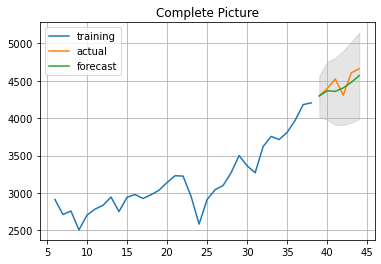

In [24]:
plt.plot(train[step:], label='training')
plt.plot(test[:step], label='actual')
plt.plot(fc, label='forecast')
plt.fill_between(lower.index, lower, upper, color='k', alpha=0.1)
plt.title('Complete Picture')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

### Still need to evaluate the model !!!!

## Model 2: SARIMA

The SARIMA model builds upon the ARIMA model. it also includes the p, q, and d parameters, but also an extra set of parameters to account for time series seasonality.

- P: The order of the seasonal autoregrssive model.
- Q: The order of the seasonal moving average model.
- D: The number of seasonal differences applied to the time series.

The SARIMA model is denoted as SARIMA(p,d,q)(P,D,Q)[s] where the 's' is the frequency of the time series.

In [25]:
## Loads the 'SaP_500_3yrs_Monthly.csv' file as a new DataFrame ('data')
## to remove any influence from our ARIMA model and uses the 'Date'
## column as the index for the DataFrame
data = pd.read_csv('SaP_500_3yrs_Monthly.csv', parse_dates=['Date'], index_col='Date')

## Removes all the columns in the 'data' DataFrame except the
## 'Close' column which is linked to the correct dates since the 
## 'Date' is the index for the DataFrame

data = data[['Close']].dropna()
data = data[::-1]

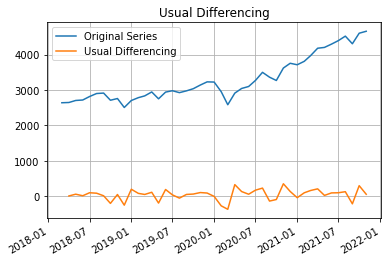

In [26]:
plt.plot(data, label='Original Series')
plt.plot(data.diff(1), label='Usual Differencing')
plt.title('Usual Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.gcf().autofmt_xdate()

plt.show()

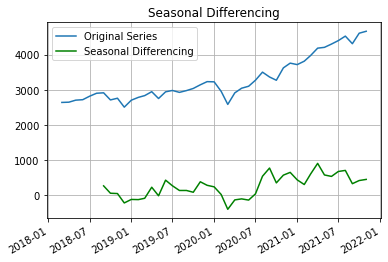

In [27]:
plt.plot(data, label='Original Series')
plt.plot(data.diff(6), label='Seasonal Differencing', color = 'green')
plt.title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.gcf().autofmt_xdate()

plt.show()

In [28]:
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data['Close'], start_p=1, start_q=1,
                         test='adf',
                         max_p=6, max_q=6, m=6,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,1,1)[6]             : AIC=inf, Time=0.18 sec
 ARIMA(0,2,0)(0,1,0)[6]             : AIC=541.383, Time=0.01 sec
 ARIMA(1,2,0)(1,1,0)[6]             : AIC=525.631, Time=0.05 sec
 ARIMA(0,2,1)(0,1,1)[6]             : AIC=inf, Time=0.07 sec
 ARIMA(1,2,0)(0,1,0)[6]             : AIC=534.313, Time=0.02 sec
 ARIMA(1,2,0)(2,1,0)[6]             : AIC=522.905, Time=0.08 sec
 ARIMA(1,2,0)(2,1,1)[6]             : AIC=521.582, Time=0.21 sec
 ARIMA(1,2,0)(1,1,1)[6]             : AIC=inf, Time=0.16 sec
 ARIMA(1,2,0)(2,1,2)[6]             : AIC=inf, Time=0.25 sec
 ARIMA(1,2,0)(1,1,2)[6]             : AIC=inf, Time=0.29 sec
 ARIMA(0,2,0)(2,1,1)[6]             : AIC=528.076, Time=0.12 sec
 ARIMA(2,2,0)(2,1,1)[6]             : AIC=517.548, Time=0.23 sec
 ARIMA(2,2,0)(1,1,1)[6]             : AIC=515.665, Time=0.18 sec
 ARIMA(2,2,0)(0,1,1)[6]             : AIC=513.666, Time=0.09 sec
 ARIMA(2,2,0)(0,1,0)[6]             : AIC=525.673, Time=0.03 sec
 A

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   45
Model:             SARIMAX(3, 2, 0)x(0, 1, [1], 6)   Log Likelihood                -250.942
Date:                             Wed, 01 Dec 2021   AIC                            511.883
Time:                                     20:42:05   BIC                            519.938
Sample:                                          0   HQIC                           514.723
                                              - 45                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7842      0.136     -5.754      0.000      -1.051      -0.517
ar.L2         -0.5947      0.156     -3.804      0.000      -0.901      -0.288
ar.L3         -0.3201      0.213     -1.503      0.133      -0.738       0.097
ma.S.L6       -0.8931      0.650     -1.375      0.169      -2.167       0.380
sigma2      3.437e+04   1.83e+04      1.874      0.061   -1577.770    7.03e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 0.41
Prob(Q):                              0.69   Prob(JB):                         0.81
Heteroskedasticity (H):               0.46   Skew:                            -0.01
Prob(H) (two-sided):                  0.19   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

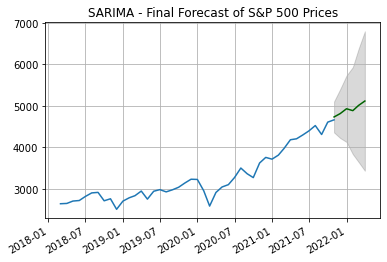

In [29]:
# Forecast
n_periods = 6
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15, label='conf int')

plt.title("SARIMA - Final Forecast of S&P 500 Prices")
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.show()

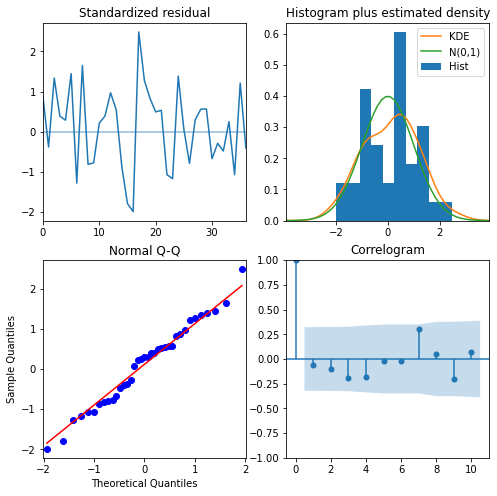

In [30]:
from statsmodels.tsa.arima.model import ARIMAResults

smodel.plot_diagnostics(figsize=(8,8))
plt.show()

In [31]:
forecasted_Price = pd.DataFrame({'Forecasted Price' :fitted_series})
forecasted_Price

,Forecasted Price
2021-11-01,4729.958220
2021-12-01,4810.806525
2022-01-01,4927.390313
2022-02-01,4882.150909
2022-03-01,5006.821674
2022-04-01,5113.629416


## Comparing the two models

## Conclusion